<a href="https://colab.research.google.com/github/alexgoosemann/computational-mechanics/blob/master/MEM3295_HW6_Fall2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEM 3295 HW6 - Fall2024
# DUE: 11/7 11:59PM

Submit the shared link to HuskyCT.

In [49]:
import pandas as pd
import numpy as np


### Question 1

* Quality of Life Data
  https://drive.google.com/file/d/1mfy3Ird6XJfZb4w_tuYnvKfypcxh9Spb/view?usp=sharing


1. Count the number of rows where `Quality of Life Index` is greater than 130. Make a new column called `Flag_QualityOfLife` where the value is `High` (i.e., value = 1 like the lecture example) if greater than 130, otherwise `Low ` (i.e., value = 0 like the lecture example).

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
file_path = '/content/drive/MyDrive/Colab Notebooks/QOL.csv'


In [52]:
# use df.info to see the summary of this dataset
df = pd.read_csv(file_path)

print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            83 non-null     int64  
 1   Country                         83 non-null     object 
 2   Quality of Life Index           83 non-null     float64
 3   Purchasing Power Index          83 non-null     float64
 4   Safety Index                    83 non-null     float64
 5   Health Care Index               83 non-null     float64
 6   Cost of Living Index            83 non-null     float64
 7   Property Price to Income Ratio  83 non-null     float64
 8   Traffic Commute Time Index      83 non-null     float64
 9   Pollution Index                 83 non-null     float64
 10  Climate Index                   83 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 7.3+ KB


In [53]:
count = (df["Quality of Life Index"] > 130).sum()
print("Number of rows where Quality of Life Index is greater than 130:", count)


Number of rows where Quality of Life Index is greater than 130: 42


In [54]:
df["Flag_QualityOfLife"] = df["Quality of Life Index"].apply(lambda x: 1 if x > 130 else 0)


In [55]:
df.head()


,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Flag_QualityOfLife
0,1,Switzerland,190.82,110.96,78.65,74.47,131.75,8.42,28.73,20.09,80.05,1
1,2,Denmark,190.01,94.73,73.28,79.96,91.67,6.66,28.69,20.40,81.80,1
2,3,Netherlands,183.31,83.89,72.78,75.76,78.64,7.35,27.81,25.28,87.11,1
3,4,Finland,182.79,89.05,72.99,76.40,77.46,8.64,28.96,11.86,56.64,1
4,5,Austria,182.37,78.23,74.77,78.40,75.49,10.40,25.68,19.20,77.79,1


2. Make a 'pairplot' for the entire dataset. Make a pairplot using the original dataset, then make the `pairplot by group` where the `hue=Flag_QualityOfLife`.
(https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


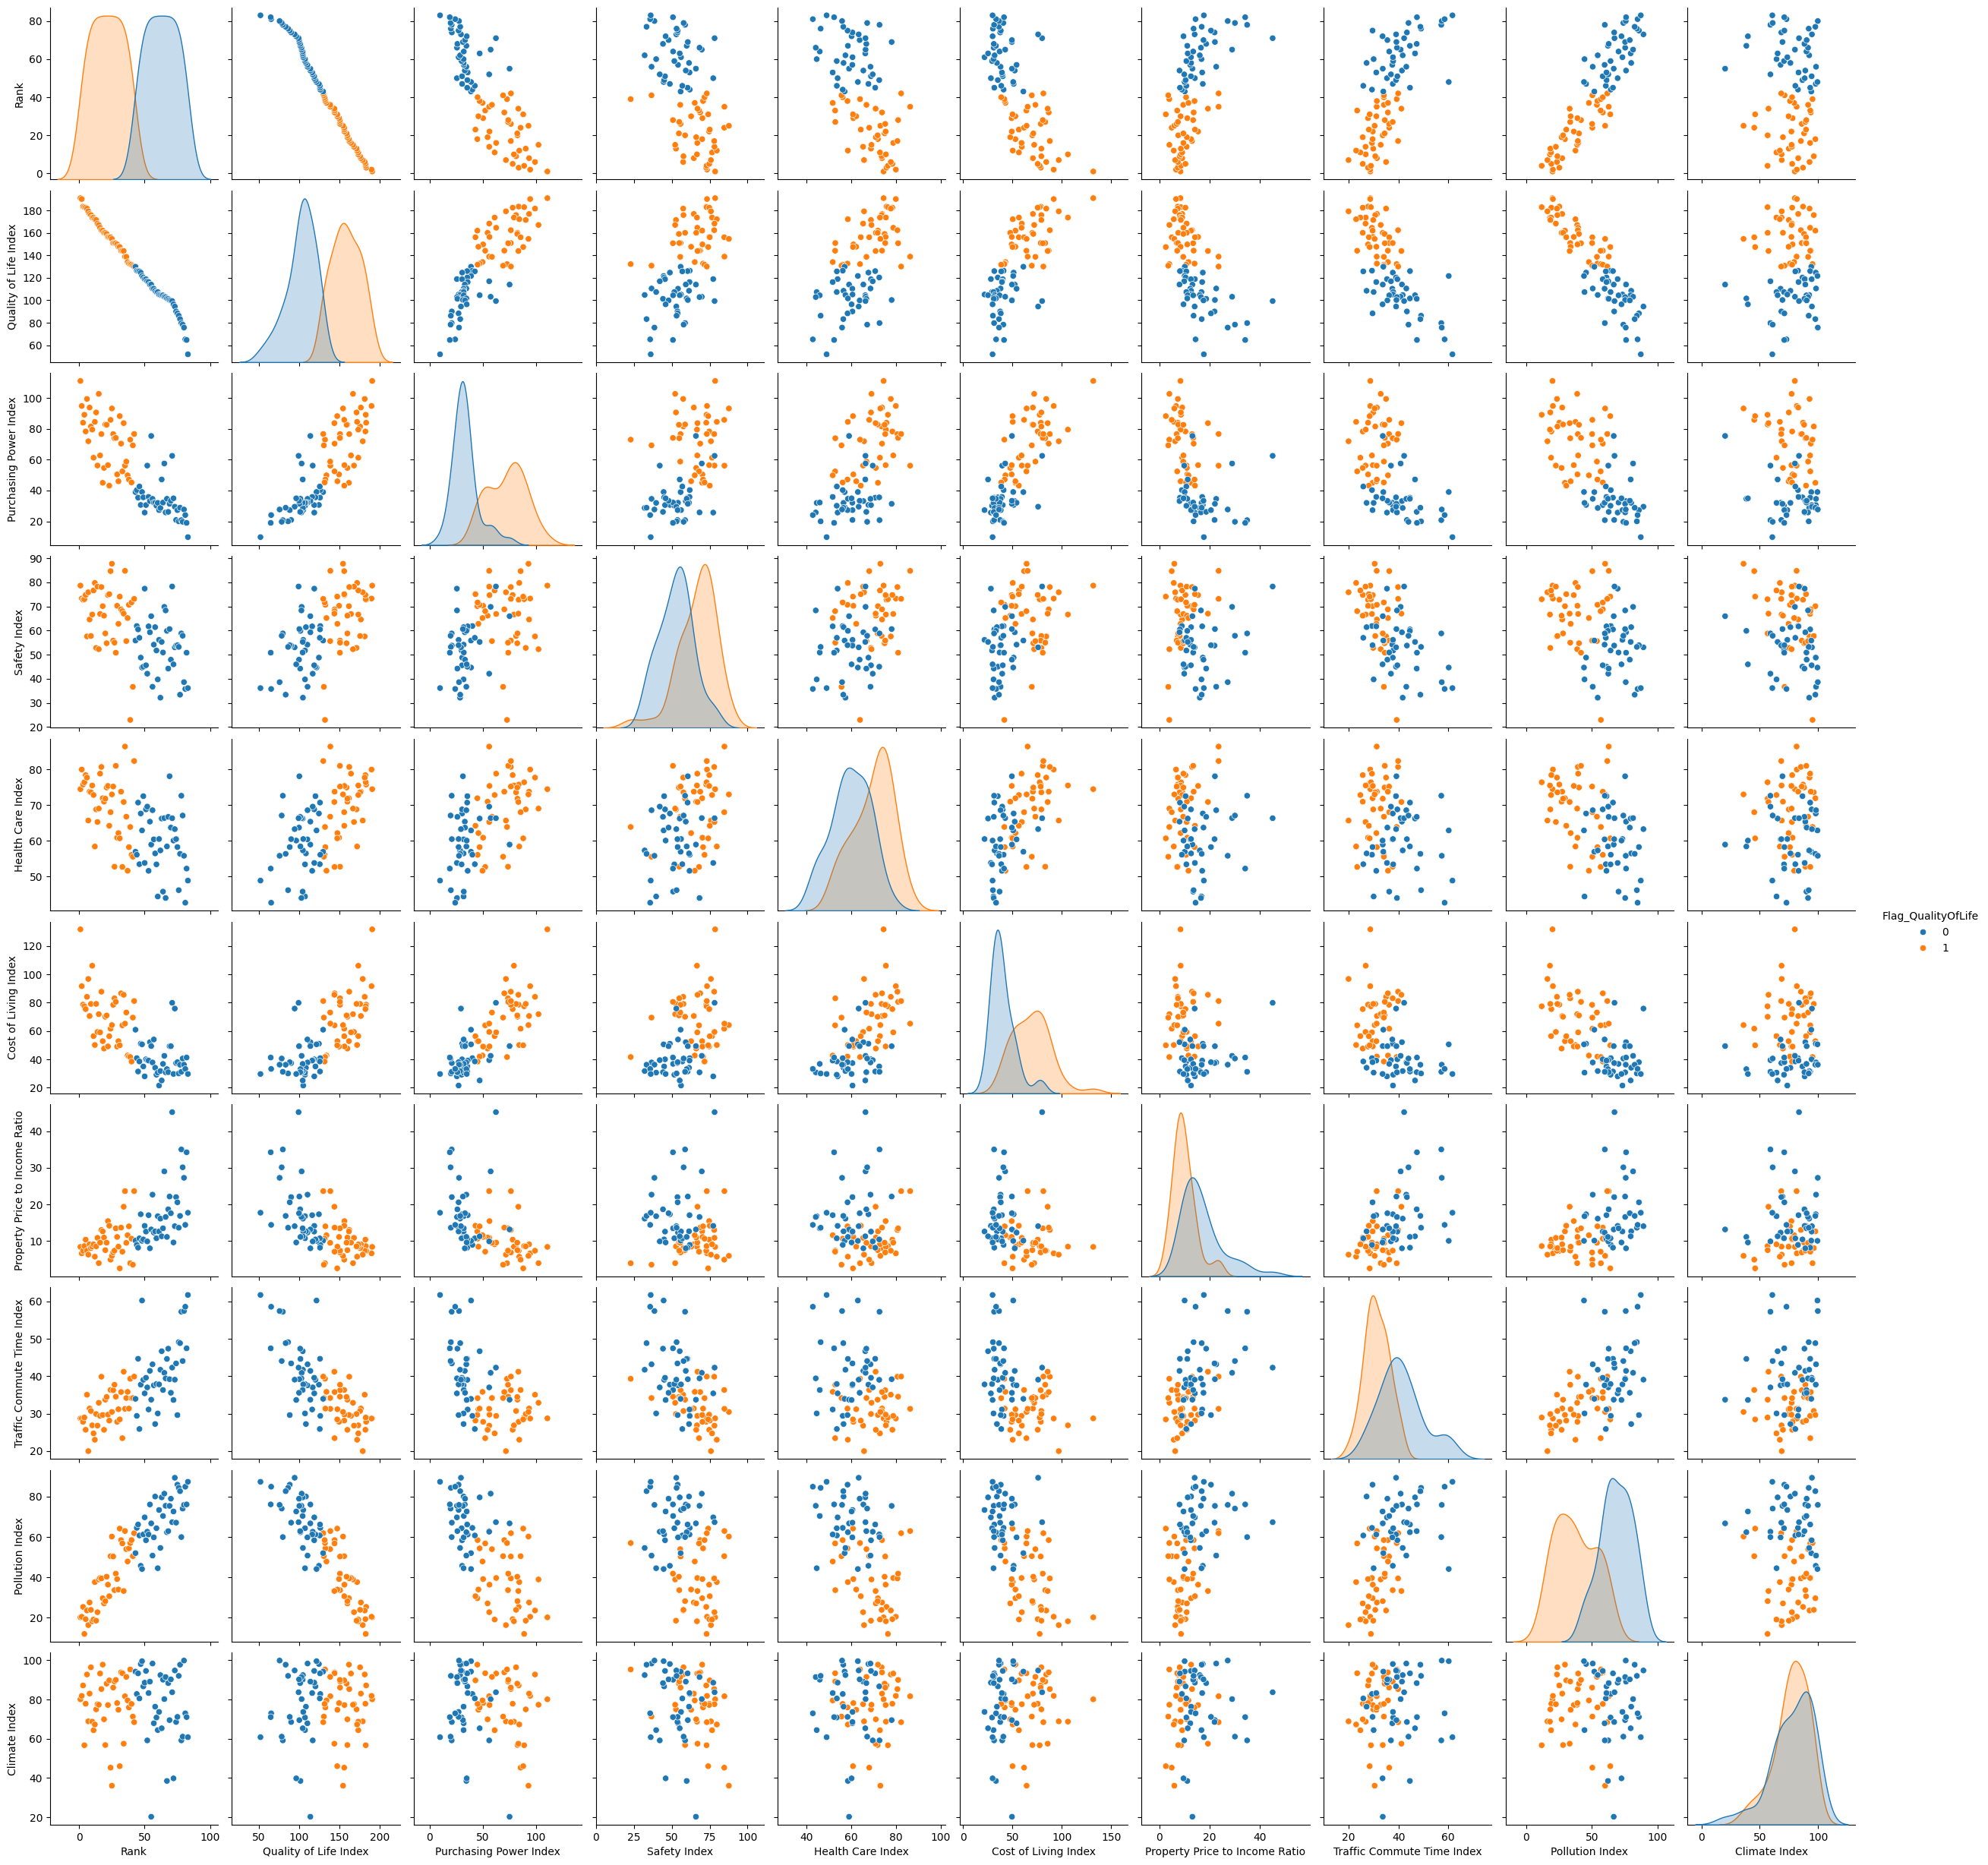

In [57]:
# Plot the pairplot
sns.pairplot(df, hue="Flag_QualityOfLife")
plt.show()


3. Write 3-5 bullet points in a text cell about some of the trends you see - for example, does the univariate distribution of some variables suprise you? What is the shape of the distributions? Is there a linear relationship between any of the variables? How do the explanatory variables relate to your target variable (`Quality of Life Index`)?

- Some variables, like Rank and Purchasing Power Index, show skewed distributions, while others, like Climate Index, are more normally distributed. The skewed distributions might indicate countries that have a significantly higher or lower value in these indices compared to others.

- Quality of Life Index has a noticeable linear relationship with other indices like Purchasing Power Index and Safety Index. Higher values in these indices are generally associated with a higher Quality of Life Index, suggesting a positive correlation.

- When Flag_QualityOfLife is 1 (indicating high quality of life), countries tend to have higher values in Purchasing Power Index, Safety Index, and Health Care Index, while having lower values in Pollution Index. This aligns with the expectation that better economic and health conditions contribute to a higher quality of life.

- Cost of Living Index doesn’t have a strong direct correlation with Quality of Life Index, suggesting that a higher cost of living does not necessarily equate to a better quality of life. Countries with a high quality of life can still vary widely in terms of living costs.

4. Calculate the 90th percentile of the `Quality of Life Index` column. Which countries have a `Quality of Life Index` greater than or equal to this value? (you can put your observation in a comment)

In [58]:

percentile_90 = df["Quality of Life Index"].quantile(0.9)
print("90th Percentile of Quality of Life Index:", percentile_90)

# Filter countries with Quality of Life Index greater than or equal to the 90th percentile
high_quality_life_countries = df[df["Quality of Life Index"] >= percentile_90]
high_quality_life_countries_list = high_quality_life_countries["Country"].tolist()

print("Countries with Quality of Life Index >= 90th percentile:", high_quality_life_countries_list)


90th Percentile of Quality of Life Index: 175.33
Countries with Quality of Life Index >= 90th percentile: ['Switzerland', 'Denmark', 'Netherlands', 'Finland', 'Austria', 'Australia', 'Iceland', 'Germany', 'New Zealand']


5. Make a histogram of `df['Pollution Index']` with nice titles, axes labels and colored blue. Add a bullet point describing what you see.

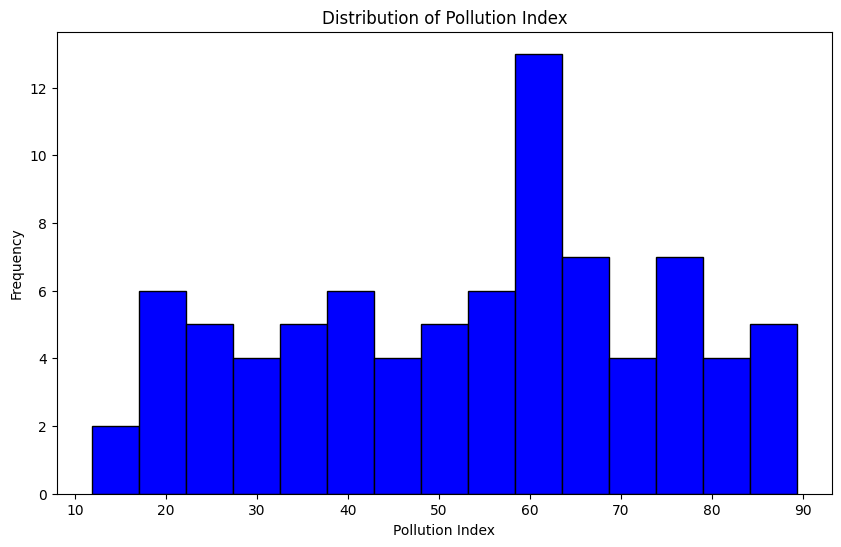

In [59]:

plt.figure(figsize=(10, 6))
plt.hist(df["Pollution Index"], bins=15, color='blue', edgecolor='black')
plt.title("Distribution of Pollution Index")
plt.xlabel("Pollution Index")
plt.ylabel("Frequency")
plt.show()


- The values of the Pollution Index are spread relatively evenly across the range, with no strong skew to either the lower or higher ends.
- A notable peak around the 60-70 range suggests that several countries have moderate pollution levels.
- There is a spread across low and high pollution values, indicating a mix of countries with varying environmental conditions.

6. Make a histogram of `df['Health Care Index']` with nice titles, axes labels and colored red. Add a bullet point describing what you see.

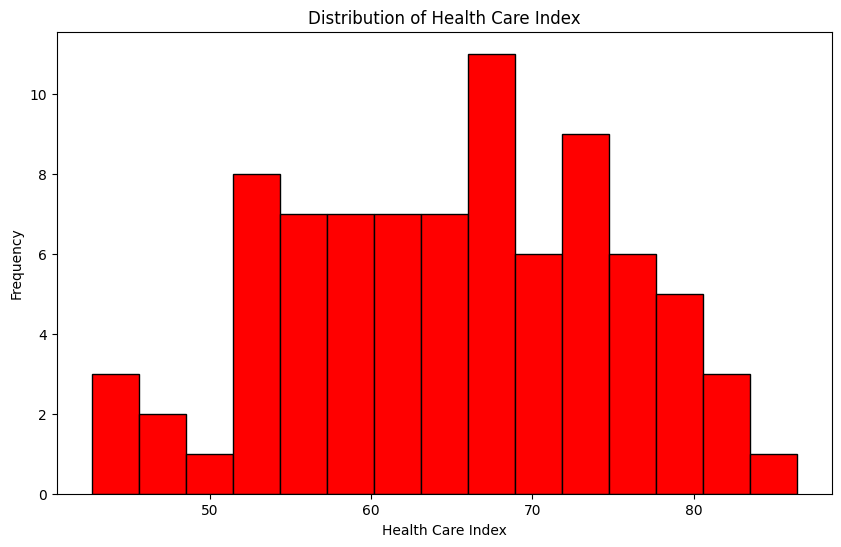

In [60]:

plt.figure(figsize=(10, 6))
plt.hist(df["Health Care Index"], bins=15, color='red', edgecolor='black')
plt.title("Distribution of Health Care Index")
plt.xlabel("Health Care Index")
plt.ylabel("Frequency")
plt.show()


- The distribution is relatively spread out, with values ranging from around 45 to 85, indicating a broad range of health care quality among countries.
- There is a noticeable peak around the 65-75 range, suggesting that many countries have moderate to high health care quality.
- Fewer countries have very low or very high Health Care Index values, reflecting that extreme health care quality levels (either very low or very high) are less common.

7. Make a scatterplot using `x = Health Care Index` vs. `y = Quality of Life Index`,  with nice titles, axes labels, and a [cool marker symbol of your choice](https://matplotlib.org/stable/api/markers_api.html).

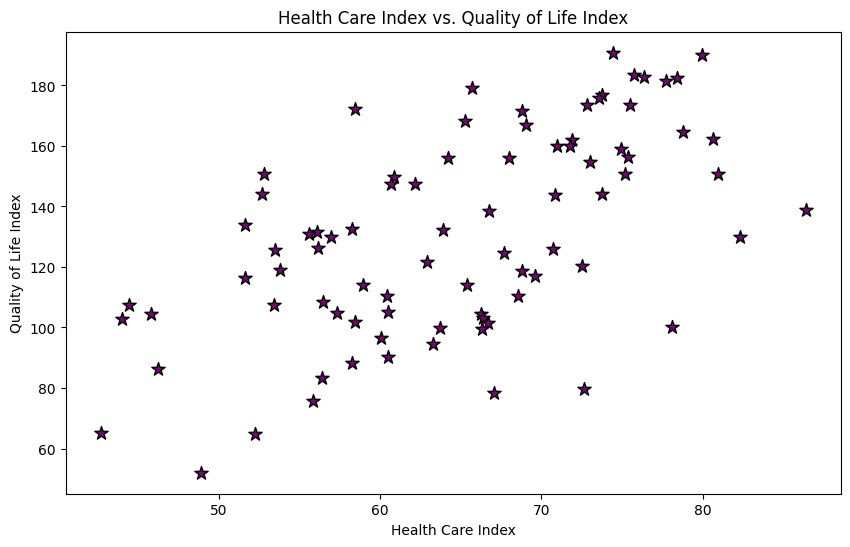

In [61]:

plt.figure(figsize=(10, 6))
plt.scatter(df["Health Care Index"], df["Quality of Life Index"], color='purple', marker='*', s=100, edgecolor='black')
plt.title("Health Care Index vs. Quality of Life Index")
plt.xlabel("Health Care Index")
plt.ylabel("Quality of Life Index")
plt.show()


8. Make a kernel density plot of `Purchasing Power Index` with `hue = Flag_QualityOfLife` [using seaborn](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). Describe what you see.

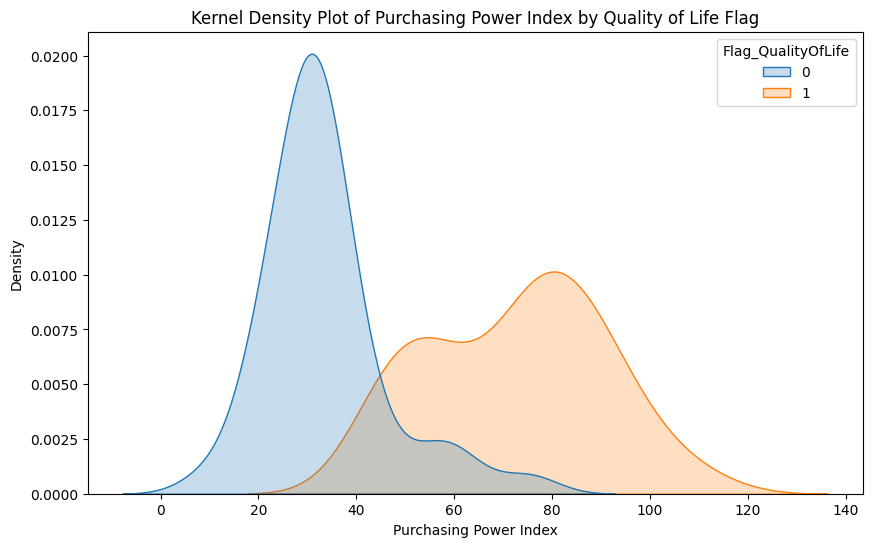

In [62]:


# Plot the kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Purchasing Power Index", hue="Flag_QualityOfLife", fill=True)
plt.title("Kernel Density Plot of Purchasing Power Index by Quality of Life Flag")
plt.xlabel("Purchasing Power Index")
plt.ylabel("Density")
plt.show()


-The distribution for countries with a high quality of life (orange curve) is centered at a much higher Purchasing Power Index range, with a peak around 70-80. This indicates that countries with a high quality of life generally have a higher purchasing power.

-The distribution for countries with a low quality of life (blue curve) is centered around a lower Purchasing Power Index range, with a peak below 40. This suggests that lower purchasing power is more common in countries with a lower quality of life.

-There is a noticeable gap between the two distributions, supporting the idea that purchasing power is a significant factor in distinguishing countries with high versus low quality of life. Countries with higher purchasing power tend to have a higher quality of life.

#### Question 2

Regenerate this figure using the mpg datatset -

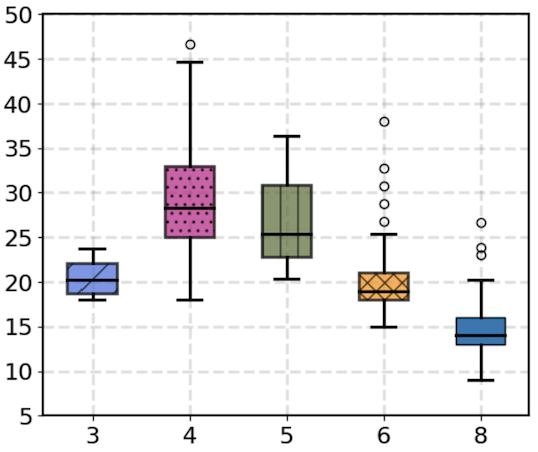

HINT:

bp = ax.boxplot(boxdata, labels=['3', '4', '5', '6', '8'], patch_artist=True)

color_all = ['royalblue', 'mediumvioletred', 'darkolivegreen', 'darkorange']

hatch_all = ['/', '..', '|', 'xx', '-' ]

for line in bp['medians']:
  line.set(color='k', linewidth=2)

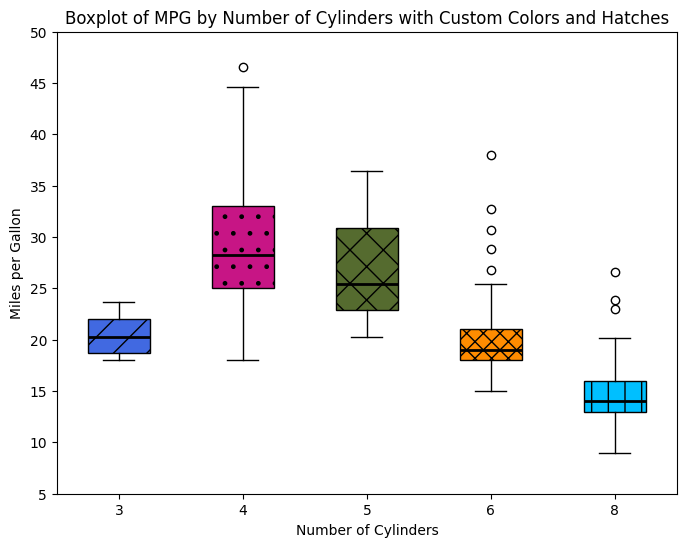

In [64]:
mpg = sns.load_dataset("mpg")


boxdata = [mpg[mpg['cylinders'] == cyl]['mpg'] for cyl in [3, 4, 5, 6, 8]]


fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(boxdata, labels=['3', '4', '5', '6', '8'], patch_artist=True)


color_all = ['royalblue', 'mediumvioletred', 'darkolivegreen', 'darkorange', 'deepskyblue']
hatch_all = ['/', '.', 'x', 'xx', '|']


for patch, color, hatch in zip(bp['boxes'], color_all, hatch_all):
    patch.set_facecolor(color)
    patch.set_hatch(hatch)


for line in bp['medians']:
    line.set(color='k', linewidth=2)


plt.ylim(5, 50)
plt.ylabel('Miles per Gallon')
plt.xlabel('Number of Cylinders')
plt.title('Boxplot of MPG by Number of Cylinders with Custom Colors and Hatches')

plt.show()


In [65]:
print("Alex Guzman 11 / 7 HW 6")

Alex Guzman 11 / 7 HW 6
